# Project Title:
KSI-Collision Predictor

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import sklearn
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
sigma_df = pd.read_csv('KSI.csv')

In [96]:
sigma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18194 entries, 0 to 18193
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  18194 non-null  float64
 1   Y                  18194 non-null  float64
 2   INDEX_             18194 non-null  int64  
 3   ACCNUM             13264 non-null  float64
 4   YEAR               18194 non-null  int64  
 5   DATE               18194 non-null  object 
 6   TIME               18194 non-null  int64  
 7   STREET1            18194 non-null  object 
 8   STREET2            16510 non-null  object 
 9   OFFSET             3402 non-null   object 
 10  ROAD_CLASS         17818 non-null  object 
 11  DISTRICT           18089 non-null  object 
 12  WARDNUM            17332 non-null  float64
 13  LATITUDE           18194 non-null  float64
 14  LONGITUDE          18194 non-null  float64
 15  LOCCOORD           18099 non-null  object 
 16  ACCLOC             127

In [97]:
sigma_df.describe()

,X,Y,INDEX_,ACCNUM,YEAR,TIME,WARDNUM,LATITUDE,LONGITUDE,FATAL_NO,ObjectId
count,1.819400e+04,1.819400e+04,1.819400e+04,1.326400e+04,18194.000000,18194.000000,1.733200e+04,18194.000000,18194.000000,827.000000,18194.000000
mean,-8.838345e+06,5.420748e+06,3.818870e+07,4.248444e+08,2012.934869,1362.615917,2.521028e+03,43.710459,-79.396201,29.073761,9097.500000
std,1.162533e+04,8.682160e+03,3.726463e+07,1.065503e+09,4.754258,630.816048,1.844803e+05,0.056369,0.104432,17.803627,5252.299734
min,-8.865305e+06,5.402162e+06,3.363207e+06,2.530100e+04,2006.000000,0.000000,1.000000e+00,43.589678,-79.638390,1.000000,1.000000
25%,-8.846591e+06,5.413242e+06,5.391370e+06,1.021229e+06,2009.000000,920.000000,7.000000e+00,43.661727,-79.470280,14.000000,4549.250000
50%,-8.838448e+06,5.419556e+06,7.644612e+06,1.197308e+06,2012.000000,1450.000000,1.300000e+01,43.702745,-79.397132,28.000000,9097.500000
75%,-8.829671e+06,5.427813e+06,8.078261e+07,1.365020e+06,2017.000000,1850.000000,2.200000e+01,43.756345,-79.318286,42.000000,13645.750000
max,-8.807929e+06,5.443099e+06,8.170606e+07,4.008024e+09,2022.000000,2359.000000,1.716222e+07,43.855445,-79.122974,78.000000,18194.000000


In [98]:
sigma_df.isnull().sum()

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                8567
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
CYCACT               17428
C

# Vizualization of dataset

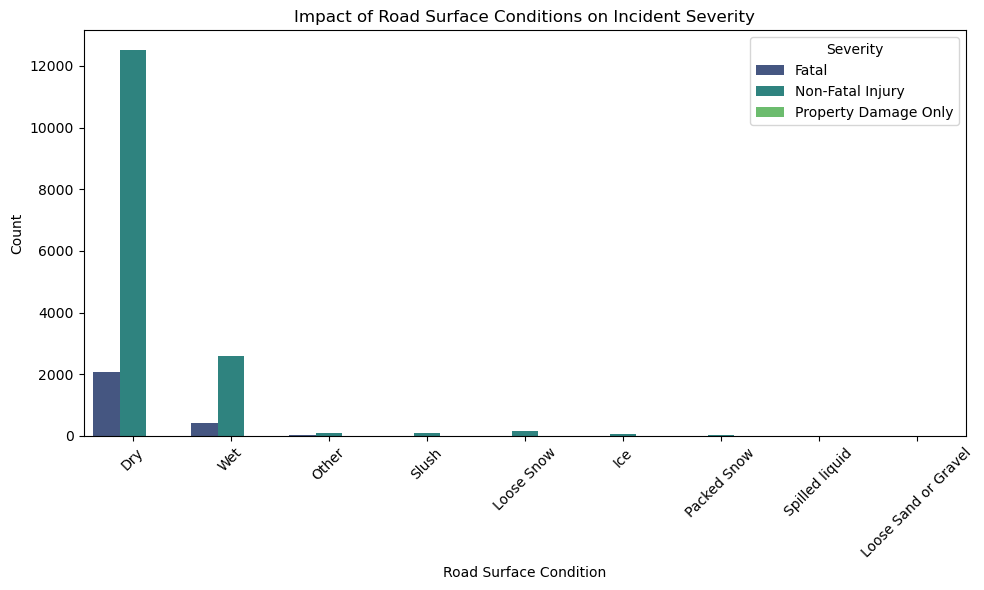

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='RDSFCOND', hue='ACCLASS', data=sigma_df, palette='viridis')
plt.title('Impact of Road Surface Conditions on Incident Severity')
plt.xticks(rotation=45)
plt.xlabel('Road Surface Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()


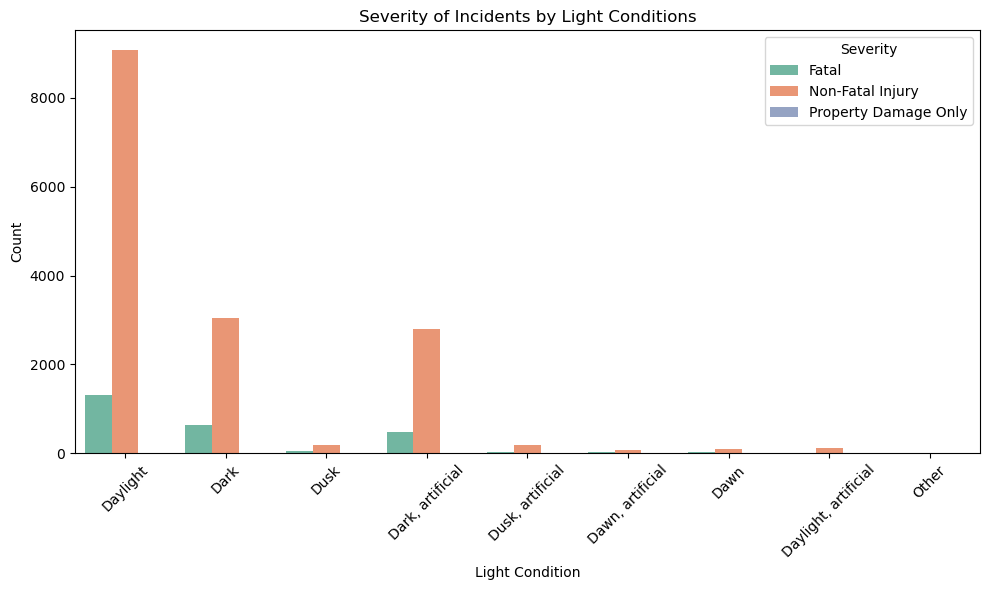

In [100]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LIGHT', hue='ACCLASS', data=sigma_df, palette='Set2')
plt.title('Severity of Incidents by Light Conditions')
plt.xticks(rotation=45)
plt.xlabel('Light Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

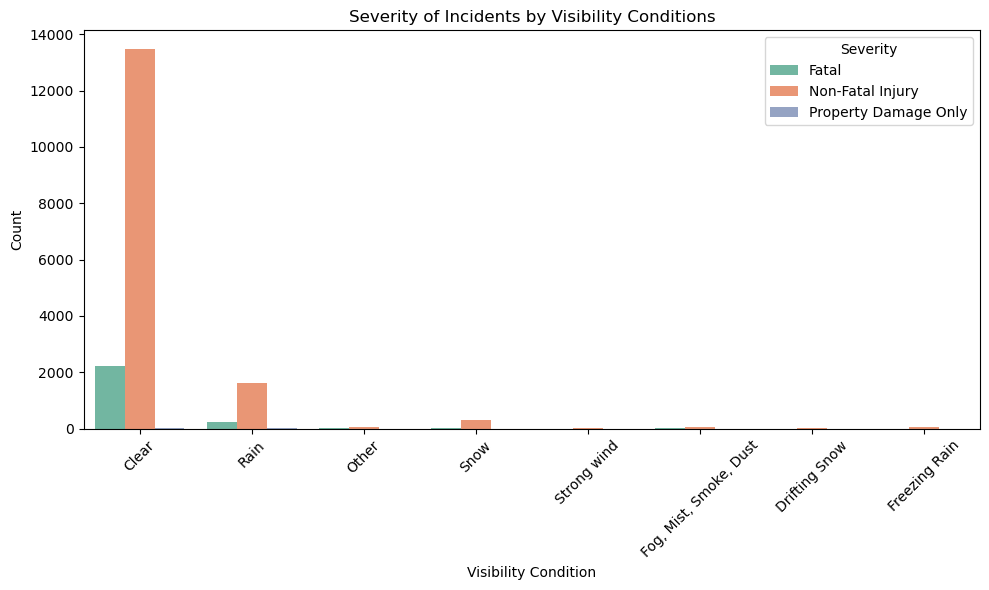

In [101]:
plt.figure(figsize=(10, 6))
sns.countplot(x='VISIBILITY', hue='ACCLASS', data=sigma_df, palette='Set2')
plt.title('Severity of Incidents by Visibility Conditions')
plt.xticks(rotation=45)
plt.xlabel('Visibility Condition')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

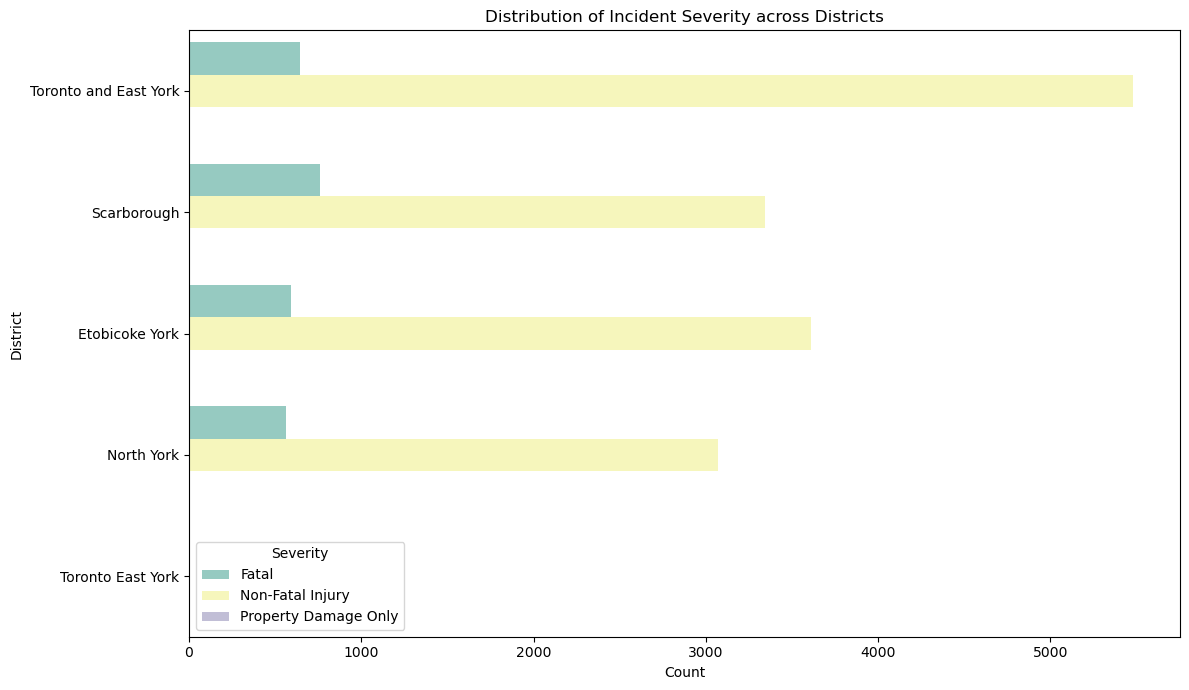

In [102]:
plt.figure(figsize=(12, 7))
sns.countplot(y='DISTRICT', hue='ACCLASS', data=sigma_df, palette='Set3')
plt.title('Distribution of Incident Severity across Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

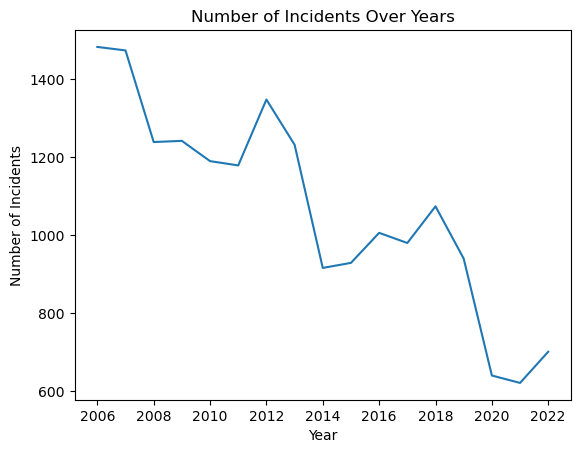

In [103]:
sns.lineplot(data=sigma_df['YEAR'].value_counts().sort_index())
plt.title('Number of Incidents Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.show()

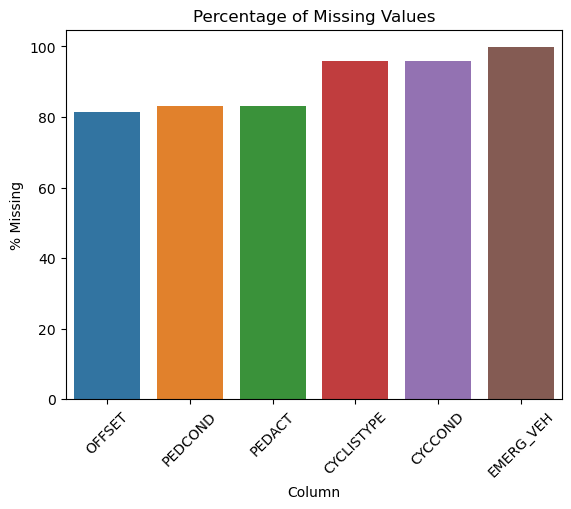

In [104]:
missing_percentage = sigma_df[['OFFSET','PEDCOND', 'PEDACT','CYCLISTYPE', 'CYCCOND','EMERG_VEH']].isnull().mean() * 100

# Plot
sns.barplot(x=missing_percentage.index, y=missing_percentage)
plt.title('Percentage of Missing Values')
plt.xlabel('Column')
plt.ylabel('% Missing')
plt.xticks(rotation=45)
plt.show()

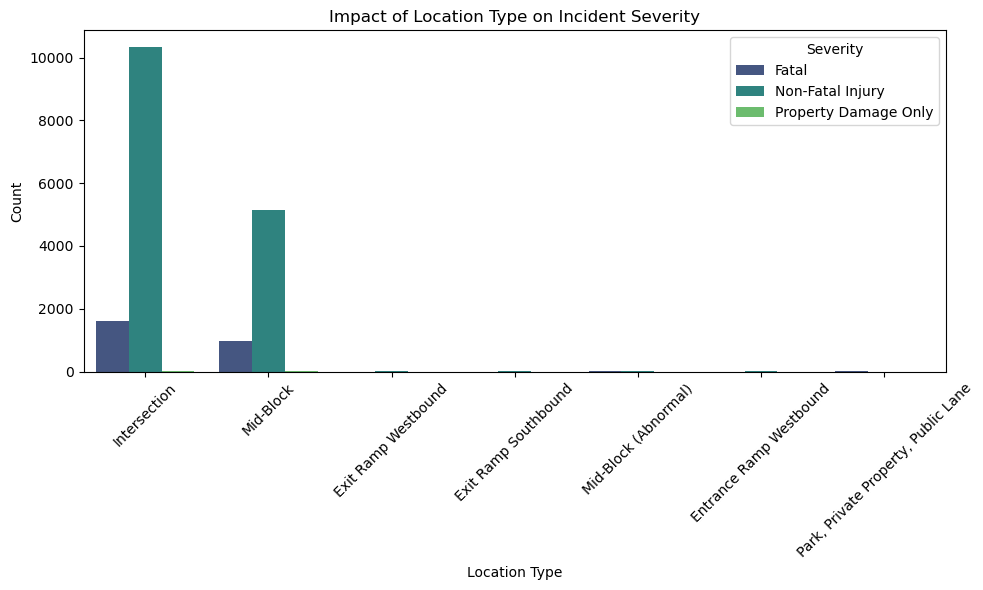

In [105]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LOCCOORD', hue='ACCLASS', data=sigma_df, palette='viridis')
plt.title('Impact of Location Type on Incident Severity')
plt.xticks(rotation=45)
plt.xlabel('Location Type')
plt.ylabel('Count')
plt.legend(title='Severity')
plt.tight_layout()
plt.show()

# Feature selection
Seleting and classifying the features

In [106]:
features = [ 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INVAGE', 'INJURY', 'INITDIR', 'MANOEUVER','DRIVACT','PEDTYPE','CYCACT', 'PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'NEIGHBOURHOOD_158']
binary_features = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']
multiclass_features = ['ROAD_CLASS', 'DISTRICT','LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND','IMPACTYPE', 'INVTYPE', 'INJURY', 'INITDIR' , 'INVAGE']
hash_features = ['NEIGHBOURHOOD_158']
columns_to_onehot_encode = ['ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'IMPACTYPE', 'INVTYPE', 'INJURY', 'INITDIR', 'DRIVACT','PEDTYPE','CYCACT','PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'INVAGE_Categorized']

In [107]:
sigma_df['NEIGHBOURHOOD_158'].shape
sigma_df.nunique()

X                     4937
Y                     4500
INDEX_               18194
ACCNUM                4629
YEAR                    17
DATE                  3925
TIME                  1329
STREET1               1856
STREET2               2704
OFFSET                 477
ROAD_CLASS              10
DISTRICT                 5
WARDNUM                 71
LATITUDE              4500
LONGITUDE             4937
LOCCOORD                 7
ACCLOC                   9
TRAFFCTL                10
VISIBILITY               8
LIGHT                    9
RDSFCOND                 9
ACCLASS                  3
IMPACTYPE               10
INVTYPE                 19
INVAGE                  21
INJURY                   4
FATAL_NO                78
INITDIR                  5
VEHTYPE                 31
MANOEUVER               16
DRIVACT                 13
DRIVCOND                10
PEDTYPE                 16
PEDACT                  15
PEDCOND                 10
CYCLISTYPE              22
CYCACT                  11
C

# Upsampling the minority class

In [108]:
df_minority = sigma_df[sigma_df['ACCLASS'] == 'Fatal']
df_majority = sigma_df[sigma_df['ACCLASS'] != 'Fatal']

from sklearn.utils import resample
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,       # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)   # reproducible results

# Combine majority class with upsampled minority class
sigma_df = pd.concat([df_majority, df_minority_upsampled])

In [109]:
sigma_df = sigma_df.dropna(subset=['ACCLASS'], inplace=False)
sigma_df = sigma_df.drop(sigma_df[sigma_df['ACCLASS'] == 'Property Damage Only'].index, inplace=False)
sigma_df.shape


(31220, 57)

# Seperating the target class and Dropping unselected columns

In [110]:
Y = sigma_df['ACCLASS']
def drop_unnecassary_columns(df, features):
    for column in df.columns:
        if column not in features:
            df.drop(column, axis=1, inplace=True)
    return df
df = drop_unnecassary_columns(sigma_df, features)
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,...,AUTOMOBILE,MOTORCYCLE,TRUCK,TRSN_CITY_VEH,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,NEIGHBOURHOOD_158
3,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,50 to 54,...,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
6,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
7,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Driver,55 to 59,...,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
10,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,20 to 24,...,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
11,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,NaN,NaN,NaN,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Vehicle Owner,unknown,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,West Humber-Clairville
6557,Local,Toronto and East York,Intersection,Stop Sign,Clear,Dark,Dry,Pedestrian Collisions,Pedestrian,75 to 79,...,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale
17125,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,...,Yes,Yes,NaN,NaN,NaN,Yes,Yes,NaN,NaN,Weston
10652,Major Arterial,North York,Intersection,Stop Sign,Clear,Daylight,Dry,Turning Movement,Passenger,70 to 74,...,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,East Willowdale


In [111]:
print(Y.value_counts())

ACCLASS
Fatal               15621
Non-Fatal Injury    15599
Name: count, dtype: int64


# Splitting the dataset for furthur preprocessing

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, Y, test_size=0.2, random_state=42)


In [113]:
print(set(y_train)) 


{'Non-Fatal Injury', 'Fatal'}


# Preprocessing high null values

In [114]:
def preprocess_high_null_values(df):
    df['maneuver_missing_info?'] = df['MANOEUVER'].isnull().replace({True: 'Yes', False: 'No'})
    df['pedtype_missing_info?'] = df['PEDTYPE'].isnull().replace({True: 'Yes', False: 'No'})
    df['cycact_missing_info?'] = df['CYCACT'].isnull().replace({True: 'Yes', False: 'No'})
    df['drivact_missing_info?'] = df['DRIVACT'].isnull().replace({True: 'Yes', False: 'No'})
    df.drop(['MANOEUVER', 'PEDTYPE', 'CYCACT', 'DRIVACT'], axis=1, inplace=True)
    return df
df = preprocess_high_null_values(df)
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,NEIGHBOURHOOD_158,maneuver_missing_info?,pedtype_missing_info?,cycact_missing_info?,drivact_missing_info?
3,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,50 to 54,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
6,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
7,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Driver,55 to 59,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,No,Yes,Yes,No
10,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,20 to 24,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
11,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Vehicle Owner,unknown,...,NaN,NaN,Yes,NaN,NaN,West Humber-Clairville,Yes,Yes,Yes,Yes
6557,Local,Toronto and East York,Intersection,Stop Sign,Clear,Dark,Dry,Pedestrian Collisions,Pedestrian,75 to 79,...,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale,Yes,No,Yes,Yes
17125,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,...,NaN,Yes,Yes,NaN,NaN,Weston,No,Yes,Yes,No
10652,Major Arterial,North York,Intersection,Stop Sign,Clear,Daylight,Dry,Turning Movement,Passenger,70 to 74,...,Yes,NaN,Yes,NaN,NaN,East Willowdale,Yes,Yes,Yes,Yes


# Categorizing Age and Frequency encoding the Neigborhood column

In [115]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

def categorize_age(X):
    def age_category(age_range):
        if age_range in ['0 to 4', '5 to 9', '10 to 14']:
            return 'kid'
        elif age_range == '15 to 19':
            return 'teenager'
        elif age_range in ['20 to 24', '25 to 29']:
            return 'youth'
        elif age_range in ['30 to 34', '35 to 39', '40 to 44', '45 to 49', '50 to 54', '55 to 59', '60 to 64']:
            return 'adult'
        elif age_range in ['65 to 69', '70 to 74', '75 to 79', '80 to 84', '85 to 89', '90 to 94', 'Over 95']:
            return 'old'
        else:
            return 'unknown'
  
    transformed_column = X.iloc[:, 0].apply(age_category)
    return pd.DataFrame(transformed_column, columns=[X.columns[0]])

def frequency_encode(X):
    freq = X.iloc[:, 0].value_counts(normalize=True)
    transformed_column = X.iloc[:, 0].map(freq)
    return pd.DataFrame(transformed_column, columns=[X.columns[0]])


# Create FunctionTransformer objects
age_categorizer_transformer = FunctionTransformer(categorize_age, validate=False)
frequency_encoder_transformer = FunctionTransformer(frequency_encode, validate=False)
binary_features = ['PEDESTRIAN', 'CYCLIST', 'AUTOMOBILE', 'MOTORCYCLE', 'TRUCK', 'TRSN_CITY_VEH', 'PASSENGER', 'SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL']
clmn_trfm1 = ColumnTransformer(
    transformers=[
        ('fill_mode', SimpleImputer(strategy='most_frequent'), multiclass_features),
        ('binary_fill', SimpleImputer(strategy='constant', fill_value='No'), binary_features),
        ('age_categorization', age_categorizer_transformer, ['INVAGE']),
        ('neighbourhood_frequency_encoding', frequency_encoder_transformer, ['NEIGHBOURHOOD_158']),
    ],
    remainder='passthrough'
)
df

,ROAD_CLASS,DISTRICT,LOCCOORD,TRAFFCTL,VISIBILITY,LIGHT,RDSFCOND,IMPACTYPE,INVTYPE,INVAGE,...,PASSENGER,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,NEIGHBOURHOOD_158,maneuver_missing_info?,pedtype_missing_info?,cycact_missing_info?,drivact_missing_info?
3,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,50 to 54,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
6,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
7,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Driver,55 to 59,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,No,Yes,Yes,No
10,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,20 to 24,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
11,Major Arterial,Toronto and East York,Intersection,No Control,Clear,Dark,Wet,Approaching,Passenger,15 to 19,...,Yes,Yes,Yes,NaN,Yes,Woodbine-Lumsden,Yes,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9324,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Pedestrian Collisions,Vehicle Owner,unknown,...,NaN,NaN,Yes,NaN,NaN,West Humber-Clairville,Yes,Yes,Yes,Yes
6557,Local,Toronto and East York,Intersection,Stop Sign,Clear,Dark,Dry,Pedestrian Collisions,Pedestrian,75 to 79,...,NaN,NaN,Yes,NaN,NaN,Humewood-Cedarvale,Yes,No,Yes,Yes
17125,Major Arterial,Etobicoke York,Intersection,Traffic Signal,Clear,Daylight,Dry,Turning Movement,Motorcycle Driver,45 to 49,...,NaN,Yes,Yes,NaN,NaN,Weston,No,Yes,Yes,No
10652,Major Arterial,North York,Intersection,Stop Sign,Clear,Daylight,Dry,Turning Movement,Passenger,70 to 74,...,Yes,NaN,Yes,NaN,NaN,East Willowdale,Yes,Yes,Yes,Yes


# Transofroming Yes-No columns with Binary transform

In [116]:

def binary_transform_array(X):
    """
    Converts specific columns with 'Yes'/'No' values to 1/0 in a numpy array.
    
    Parameters:
    - X: numpy array, the input data.
    
    Returns:
    - numpy array, the modified data with 'Yes'/'No' values converted to 1/0.
    """
    # Example indices for 'Yes'/'No' columns to convert
    yes_no_indices = [12,13,14,15,16,17,18,19,20,21,22,25,26,27,28]  # Update these indices based on your actual 'Yes'/'No' columns
    
    for idx in yes_no_indices:
        X[:, idx] = np.where(X[:, idx] == 'Yes', 1, 0)
    
    return X

from sklearn.preprocessing import FunctionTransformer

binary_transformer = FunctionTransformer(binary_transform_array, validate=False)


# Applying one hot encoding for other categorical columns

In [117]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

object_columns = [0,1,2,3,4,5,6,7,8,9,10,11,23]

clmn_trfm2 = ColumnTransformer(
    transformers=[
        ('one_hot_encoder',
         OneHotEncoder(
             drop='first',
             handle_unknown='ignore',
             sparse_output=False  
         ),
         object_columns),
    ],
    remainder='passthrough'  # Keep other columns unchanged
)

In [118]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

# Creating the Pipeline

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessing_1', clmn_trfm1),
    ('binary_conversion', binary_transformer),
    ('preprocessing_2',clmn_trfm2),
    ('logistic_regression', LogisticRegression(solver='liblinear'))
])

pipeline.fit(X_train,y_train)



Pipeline(steps=[('preprocessing_1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('fill_mode',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['ROAD_CLASS', 'DISTRICT',
                                                   'LOCCOORD', 'TRAFFCTL',
                                                   'VISIBILITY', 'LIGHT',
                                                   'RDSFCOND', 'IMPACTYPE',
                                                   'INVTYPE', 'INJURY',
                                                   'INITDIR', 'INVAGE']),
                                                 ('binary_fill',
                                                  SimpleImputer(fill_value='No',
                                                                strategy='constant'),
                                                  ['PEDESTR...
                ('binary_conversion',
                 FunctionTransformer(func=<function binary_transform_array at 0x167fe82c0>)),
                ('preprocessing_2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 23])])),
                ('logistic_regression',
                 LogisticRegression(solver='liblinear'))])

# Testing Model (not final)

In [120]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, auc

y_pred = pipeline.predict(X_test)
y_scores = pipeline.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")


Model accuracy: 76.49%


In [121]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.7527719508540606
Recall: 0.7961965134706814


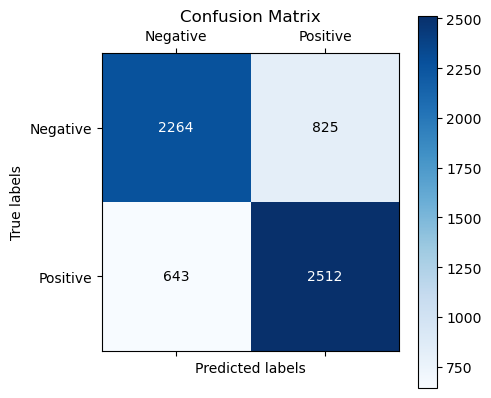

In [122]:
cm = confusion_matrix(y_test, y_pred)

# Simple visualization
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.xticks([0, 1], ['Negative', 'Positive'])
plt.yticks([0, 1], ['Negative', 'Positive'])
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j]), ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")
plt.savefig('assets/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

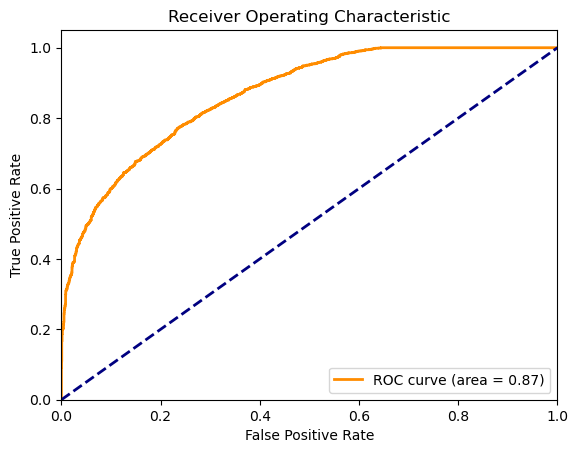

In [123]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('assets/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

Encoded features: 109
All features after preprocessing: 125
Coefficients: 125


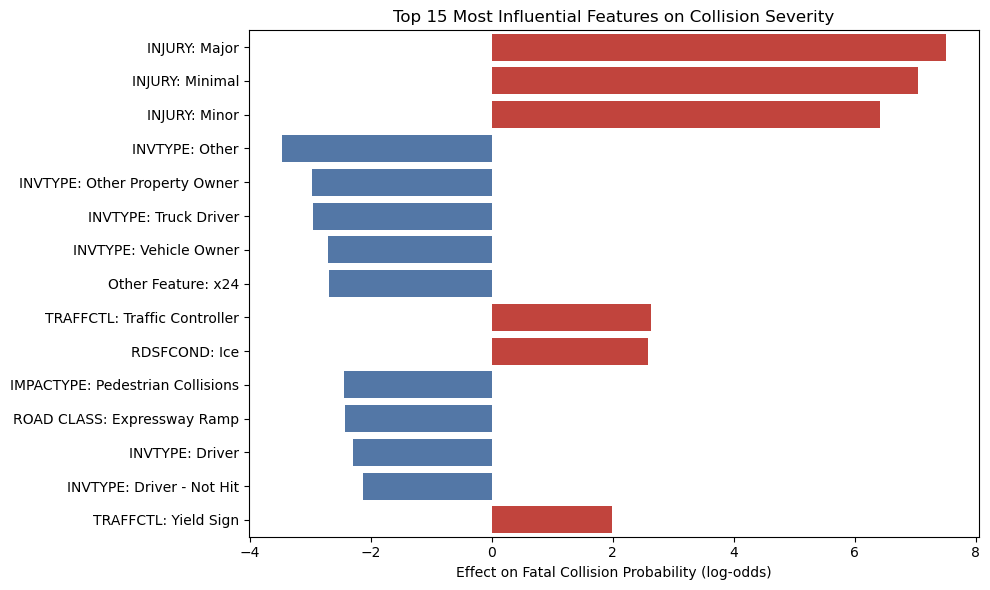

In [124]:
# =============================================
# Feature Importance Visualization (for README)
# =============================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# # 1️⃣ Extract coefficients from the logistic regression model
# model = pipeline.named_steps['logistic_regression']   # your model step
# encoder = pipeline.named_steps['preprocessing_2']     # your one-hot encoder step

# # Get feature names from encoder output
# try:
#     feature_names = encoder.get_feature_names_out()
# except AttributeError:
#     feature_names = [f"Feature_{i}" for i in range(len(model.coef_[0]))]

# # 2️⃣ Combine feature names with coefficients
# importance = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': model.coef_[0]
# }).sort_values('Importance', key=abs, ascending=False)

# # 3️⃣ Plot top 15 features
# plt.figure(figsize=(10,6))
# sns.barplot(
#     data=importance.head(15),
#     y='Feature',
#     x='Importance',
#     palette='viridis'
# )
# plt.title('Top 15 Most Influential Features on Collision Severity')
# plt.xlabel('Coefficient Value (higher = more influence)')
# plt.ylabel('')
# plt.tight_layout()

# # 4️⃣ Save to your assets folder
# plt.savefig('assets/feature_importance.png', dpi=300, bbox_inches='tight')
# plt.show()


# Extract the trained model and encoder from pipeline
model = pipeline.named_steps['logistic_regression']
encoder_block = pipeline.named_steps['preprocessing_2']

# The OneHotEncoder inside ColumnTransformer
encoder = encoder_block.named_transformers_['one_hot_encoder']

# Get one-hot feature names from encoder
encoded_feature_names = encoder.get_feature_names_out()

# Get all feature names output by preprocessing_2 (one-hot + passthrough)
all_feature_names = encoder_block.get_feature_names_out()

print(f"Encoded features: {len(encoded_feature_names)}")
print(f"All features after preprocessing: {len(all_feature_names)}")
print(f"Coefficients: {len(model.coef_[0])}")

# Sanity check: make sure lengths match
n_features = min(len(all_feature_names), len(model.coef_[0]))

# Use only the first n_features if there's a slight mismatch
importance = pd.DataFrame({
    'Feature': all_feature_names[:n_features],
    'Coefficient': model.coef_[0][:n_features]
})

# Clean feature names for readability
importance['Feature'] = (
    importance['Feature']
    .str.replace('one_hot_encoder__', '', regex=False)
    .str.replace('x0_', 'ROAD_CLASS: ', regex=False)
    .str.replace('x1_', 'DISTRICT: ', regex=False)
    .str.replace('x2_', 'LOCCOORD: ', regex=False)
    .str.replace('x3_', 'TRAFFCTL: ', regex=False)
    .str.replace('x4_', 'VISIBILITY: ', regex=False)
    .str.replace('x5_', 'LIGHT: ', regex=False)
    .str.replace('x6_', 'RDSFCOND: ', regex=False)
    .str.replace('x7_', 'IMPACTYPE: ', regex=False)
    .str.replace('x8_', 'INVTYPE: ', regex=False)
    .str.replace('x9_', 'INJURY: ', regex=False)
    .str.replace('x10_', 'INITDIR: ', regex=False)
    .str.replace('x11_', 'INVAGE: ', regex=False)
    .str.replace('remainder__', 'Other Feature: ', regex=False)
    .str.replace('_', ' ', regex=False)
)

# Sort and select top 15 influential features
top_features = (
    importance.reindex(importance['Coefficient'].abs().sort_values(ascending=False).index)
    .head(15)
)

# Plot with color-coded direction
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x='Coefficient',
    y='Feature',
    palette=['#d73027' if x > 0 else '#4575b4' for x in top_features['Coefficient']]
)
plt.title('Top 15 Most Influential Features on Collision Severity')
plt.xlabel('Effect on Fatal Collision Probability (log-odds)')
plt.ylabel('')
plt.tight_layout()
plt.savefig('assets/feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()